# Swing states

V případě amerických prezidentských voleb obecně platí, že ve většině států dlouhodobě vyhrávají kandidáti jedné strany. Například v Kalifornii vyhrává kandidát Demokratické strany or roku 1992, v Texasu kandidát Republikánské strany od roku 1980, v Kansasu do konce od roku 1968 atd. Státy, kde se vítězné strany střídají, jsou označovány jako "swing states" ("kolísavé státy"). Tvým úkolem je vybrat státy, které lze označit jako swing states.

V souboru [1976-2020-president.csv](1976-2020-president.csv) najdeš historické výsledky amerických prezidentských voleb. Každý řádek souboru obsahuje počet hlasů pro kandidáta dané strany v daném roce.

V souboru jsou důležité následující sloupce:

- `Year` - rok voleb,
- `State` - stát,
- `party_simplified` - zjednodušené označení politické strany,
- `candidatevotes` - počet hlasů pro vybraného kandidáta,
- `totalvotes` - celkový počet odevzdaných hlasů.

Proveď níže uvedené úkoly.

1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody `rank()`). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou `rank()` je nutné použít metodu `groupby()`.
1. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.
1. Pomocí metody `shift()` přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.
1. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci `numpy.where()` nebo metodu `apply()`.
1. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran.
1. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).

1. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.
1. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.
1. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.
1. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

načtení dat ze souboru 1976-2020-prezident.txt

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
volby_prezident_data = pd.read_csv("1976-2020-president.txt")
df_working_data = volby_prezident_data[["year", "state", "party_simplified", "candidatevotes", "totalvotes"]] # pro další ukoly použiji df_working_data jako base
df_working_data.head()

,year,state,party_simplified,candidatevotes,totalvotes
0,1976,ALABAMA,DEMOCRAT,659170,1182850
1,1976,ALABAMA,REPUBLICAN,504070,1182850
2,1976,ALABAMA,OTHER,9198,1182850
3,1976,ALABAMA,OTHER,6669,1182850
4,1976,ALABAMA,OTHER,1954,1182850


1. Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody `rank()`). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou `rank()` je nutné použít metodu `groupby()`.

In [2]:
df_working_data["rank"]=df_working_data.groupby(["year", "state"])["candidatevotes"].rank(ascending=False) 
df_working_data.head() # ok stejny počet řádků

C:\Users\IBM\AppData\Local\Temp\ipykernel_18180\953907000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_working_data["rank"]=df_working_data.groupby(["year", "state"])["candidatevotes"].rank(ascending=False)


,year,state,party_simplified,candidatevotes,totalvotes,rank
0,1976,ALABAMA,DEMOCRAT,659170,1182850,1.0
1,1976,ALABAMA,REPUBLICAN,504070,1182850,2.0
2,1976,ALABAMA,OTHER,9198,1182850,3.0
3,1976,ALABAMA,OTHER,6669,1182850,4.0
4,1976,ALABAMA,OTHER,1954,1182850,5.0


2. Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb.

In [3]:
df_working_data_vitez = df_working_data[df_working_data["rank"] == 1]
df_working_data_vitez = df_working_data_vitez.reset_index()
df_working_data_vitez.head()

,index,year,state,party_simplified,candidatevotes,totalvotes,rank
0,0,1976,ALABAMA,DEMOCRAT,659170,1182850,1.0
1,7,1976,ALASKA,REPUBLICAN,71555,123574,1.0
2,11,1976,ARIZONA,REPUBLICAN,418642,742719,1.0
3,19,1976,ARKANSAS,DEMOCRAT,498604,767535,1.0
4,23,1976,CALIFORNIA,REPUBLICAN,3882244,7803770,1.0


3. Pomocí metody `shift()` přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.

In [4]:
df_working_data_vitez_sorted = df_working_data_vitez.sort_values(["state", "year"])
df_working_data_vitez_sorted["party_simplified_prev"] = df_working_data_vitez_sorted.groupby(["state"])["party_simplified"].shift()
df_working_data_vitez_sorted.head() # obsahuje i data za rok 1976

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,party_simplified_prev
0,0,1976,ALABAMA,DEMOCRAT,659170,1182850,1.0,NaN
51,332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0,DEMOCRAT
102,696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0,REPUBLICAN
153,1019,1988,ALABAMA,REPUBLICAN,815576,1378476,1.0,REPUBLICAN
204,1304,1992,ALABAMA,REPUBLICAN,804283,1688060,1.0,REPUBLICAN


4. Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci `numpy.where()` nebo metodu `apply()`.

In [5]:
df_working_data_vitez_sorted["change"] = np.where(df_working_data_vitez_sorted["party_simplified"] == df_working_data_vitez_sorted["party_simplified_prev"], "0", "1") # porovnávám hodnoty ve dvou sloupcích
df_working_data_vitez_sorted["change"]= pd.to_numeric(df_working_data_vitez_sorted["change"]) # změna dat.typu z object na int u sloupce "change" nutno pro další práci
df_working_data_vitez_sorted.head()

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,party_simplified_prev,change
0,0,1976,ALABAMA,DEMOCRAT,659170,1182850,1.0,NaN,1
51,332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0,DEMOCRAT,1
102,696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0,REPUBLICAN,0
153,1019,1988,ALABAMA,REPUBLICAN,815576,1378476,1.0,REPUBLICAN,0
204,1304,1992,ALABAMA,REPUBLICAN,804283,1688060,1.0,REPUBLICAN,0


5. Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran. 
komentář:pouze období 1980 - 2020 - eliminace roku 1976 protože nemáme předchozí data a další analýza by mohla být těmito daty ovlivněna.

In [6]:
df_working_data_vitez_sorted_filtr = df_working_data_vitez_sorted[~df_working_data_vitez_sorted["party_simplified_prev"].isna()] # ~ nám v tomto případě říka vyber vsechny řadky, kde neni ve sloupci "party_simplified_prev" 0 - eliminace roku 1976 
df_working_data_vitez_sorted_filtr.head() # data z roku 1976 eliminována jelikož nemáme data z předchozích voleb a tudíž nemohu v roce 1976 určit zda u voleb došlo ke změně vitězné strany

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,party_simplified_prev,change
51,332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0,DEMOCRAT,1
102,696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0,REPUBLICAN,0
153,1019,1988,ALABAMA,REPUBLICAN,815576,1378476,1.0,REPUBLICAN,0
204,1304,1992,ALABAMA,REPUBLICAN,804283,1688060,1.0,REPUBLICAN,0
255,1674,1996,ALABAMA,REPUBLICAN,769044,1534349,1.0,REPUBLICAN,0


In [7]:
df_vysledek_1 = df_working_data_vitez_sorted_filtr[df_working_data_vitez_sorted_filtr["change"] == 1].groupby(["state"]).count().sort_values("change", ascending=False)
df_vysledek_1 = df_vysledek_1[["change"]]
df_vysledek_1.head(15)
#df_vysledek_1.info()

,change
state,
OHIO,5
FLORIDA,5
WISCONSIN,4
PENNSYLVANIA,4
GEORGIA,4
IOWA,4
MICHIGAN,3
WEST VIRGINIA,3
TENNESSEE,3


6. Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Text(0.5, 0, 'Name of States')

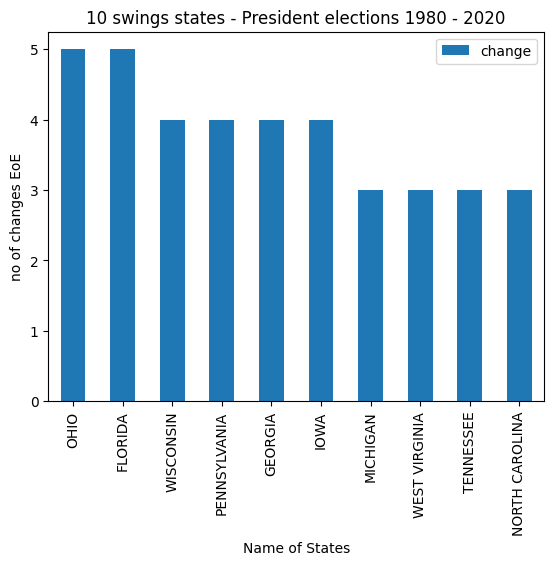

In [8]:
df_vysledek_1.head(10).plot(kind="bar", title="10 swings states - President elections 1980 - 2020") 
plt.ylabel("no of changes EoE")
plt.xlabel("Name of States")

Pro další část pracuj s tabulkou se dvěma nejúspěšnějšími kandidáty pro každý rok a stát (tj. s tabulkou, která oproti té minulé neobsahuje jen vítěze, ale i druhého v pořadí).

In [10]:
df_working_data_prvni_druhy = df_working_data[(df_working_data["rank"] == 1) | (df_working_data["rank"] == 2)].sort_values(["state", "year", "rank"])
df_working_data_prvni_druhy.head() # obsahuje data z roku 1976

,year,state,party_simplified,candidatevotes,totalvotes,rank
0,1976,ALABAMA,DEMOCRAT,659170,1182850,1.0
1,1976,ALABAMA,REPUBLICAN,504070,1182850,2.0
332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0
333,1980,ALABAMA,DEMOCRAT,636730,1341929,2.0
696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0


7. Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.

pomocí metody(funkce) diff a vytvoření df - df_working_rozdil, který se použije pro úkoly 7- 9

In [11]:
df_working_data_prvni_druhy["diff_of_votes"] = df_working_data_prvni_druhy.groupby(["state"])["candidatevotes"].diff(-1)
df_working_rozdil = df_working_data_prvni_druhy[df_working_data_prvni_druhy["rank"] == 1]
df_working_rozdil = df_working_rozdil.reset_index()
df_working_rozdil.head(15)

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,diff_of_votes
0,0,1976,ALABAMA,DEMOCRAT,659170,1182850,1.0,155100.0
1,332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0,17462.0
2,696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0,320950.0
3,1019,1988,ALABAMA,REPUBLICAN,815576,1378476,1.0,266070.0
4,1304,1992,ALABAMA,REPUBLICAN,804283,1688060,1.0,114203.0
5,1674,1996,ALABAMA,REPUBLICAN,769044,1534349,1.0,106879.0
6,2042,2000,ALABAMA,REPUBLICAN,941173,1666272,1.0,248562.0
7,2411,2004,ALABAMA,REPUBLICAN,1176394,1883415,1.0,482461.0
8,2728,2008,ALABAMA,REPUBLICAN,1266546,2099819,1.0,453067.0
9,3079,2012,ALABAMA,REPUBLICAN,1255925,2074338,1.0,460229.0


8. Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.

In [12]:
df_working_rozdil["diff_%_total"] = df_working_rozdil["diff_of_votes"] / df_working_rozdil["totalvotes"]
df_working_rozdil.head()

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,diff_of_votes,diff_%_total
0,0,1976,ALABAMA,DEMOCRAT,659170,1182850,1.0,155100.0,0.131124
1,332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0,17462.0,0.013013
2,696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0,320950.0,0.222617
3,1019,1988,ALABAMA,REPUBLICAN,815576,1378476,1.0,266070.0,0.193018
4,1304,1992,ALABAMA,REPUBLICAN,804283,1688060,1.0,114203.0,0.067653


9. Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.

srovnáno k celkovému počtu hlasů v daném státě a volebním roce (porovnáváme pouze dva první kandidáty)

In [13]:
df_margin_total = df_working_rozdil.sort_values(["diff_%_total"])
df_margin_total.head()

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,diff_of_votes,diff_%_total
114,2106,2000,FLORIDA,REPUBLICAN,2912790,5963110,1.0,537.0,0.000090
378,2266,2000,NEW MEXICO,DEMOCRAT,286783,598605,1.0,366.0,0.000611
308,2907,2008,MISSOURI,REPUBLICAN,1445814,2925205,1.0,3903.0,0.001334
253,479,1980,MASSACHUSETTS,REPUBLICAN,1057631,2524090,1.0,3829.0,0.001517
444,241,1976,OREGON,REPUBLICAN,492120,1029876,1.0,1713.0,0.001663


In [14]:
df_working_data_pivot = df_working_data_vitez_sorted_filtr.copy() # bez dat roku 1976
df_working_data_pivot.head()

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,party_simplified_prev,change
51,332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0,DEMOCRAT,1
102,696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0,REPUBLICAN,0
153,1019,1988,ALABAMA,REPUBLICAN,815576,1378476,1.0,REPUBLICAN,0
204,1304,1992,ALABAMA,REPUBLICAN,804283,1688060,1.0,REPUBLICAN,0
255,1674,1996,ALABAMA,REPUBLICAN,769044,1534349,1.0,REPUBLICAN,0


vytvořit vlastní funkci, která zohlední všechny možné změny a dát je do sloupce "change_detail" 
1. zmena  z DEMOCRAT to REPUBLICAN ozn. To_Rep.......tzn. ve sloupci "change" je 1
2. zmena  z DEMOCRAT to DEMOCRAT ozn. No_swing.......tzn. ve sloupci "change" je 0
3. zmena  z REPUBLICAN to REPUBLICAN ozn. No_swing.......tzn. ve sloupci "change" je 0
4. zmena  z REPUBLICAN to DEMOCRAT ozn. To_Dem.......tzn. ve sloupci "change" je 1

In [15]:
# definice vlastní funkce change_detail logika funkce popsána výše
def change_detail(row):
    if row["change"] == 1 and row["party_simplified_prev"] == "DEMOCRAT":
        return "To_Rep"
    elif row["change"] == 1 and row["party_simplified_prev"] == "REPUBLICAN":
        return "To_Dem"
    elif row["change"] == 0 and row["party_simplified_prev"] == "REPUBLICAN":
        return "No_swing"
    else:
        return "No_swing"


In [16]:
# volání funkce
df_working_data_pivot["change_detail"] = df_working_data_pivot.apply(change_detail,axis=1) # vytvoř nový sloupec "change_detail" tím, že provedeš funkci change_detail
df_working_data_pivot

,index,year,state,party_simplified,candidatevotes,totalvotes,rank,party_simplified_prev,change,change_detail
51,332,1980,ALABAMA,REPUBLICAN,654192,1341929,1.0,DEMOCRAT,1,To_Rep
102,696,1984,ALABAMA,REPUBLICAN,872849,1441713,1.0,REPUBLICAN,0,No_swing
153,1019,1988,ALABAMA,REPUBLICAN,815576,1378476,1.0,REPUBLICAN,0,No_swing
204,1304,1992,ALABAMA,REPUBLICAN,804283,1688060,1.0,REPUBLICAN,0,No_swing
255,1674,1996,ALABAMA,REPUBLICAN,769044,1534349,1.0,REPUBLICAN,0,No_swing
...,...,...,...,...,...,...,...,...,...,...
407,2722,2004,WYOMING,REPUBLICAN,167629,243861,1.0,REPUBLICAN,0,No_swing
458,3073,2008,WYOMING,REPUBLICAN,164958,254904,1.0,REPUBLICAN,0,No_swing
509,3388,2012,WYOMING,REPUBLICAN,170962,250701,1.0,REPUBLICAN,0,No_swing
560,3732,2016,WYOMING,REPUBLICAN,174419,258788,1.0,REPUBLICAN,0,No_swing


10. Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [18]:
df_result_pivot = pd.pivot_table(data = df_working_data_pivot , values="state" , index="year" , columns="change_detail" , aggfunc=len)
df_result_pivot

change_detail,No_swing,To_Dem,To_Rep
year,,,
1980,35.0,NaN,16.0
1984,45.0,NaN,6.0
1988,42.0,9.0,NaN
1992,29.0,22.0,NaN
1996,46.0,2.0,3.0
2000,40.0,NaN,11.0
2004,48.0,1.0,2.0
2008,42.0,9.0,NaN
2012,49.0,NaN,2.0
